In [1]:
import numpy as np
import librosa
import pandas as pd
import os
from tensorflow.keras.models import load_model
from pydub import AudioSegment
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint 

def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = 174 - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print(e)
        return None 
     
    return mfccs



def print_prediction(file_name):
    model = load_model('weights.best.basic_cnn.hdf5')
    le = LabelEncoder()
    le.classes_ = np.load('classes.npy')
    prediction_feature = extract_features(file_name) 
    prediction_feature = prediction_feature.reshape(1, 40, 174, 1)
    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

C:\Anaconda3\envs\tensorflow\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
C:\Anaconda3\envs\tensorflow\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
file_name = 'outer_test_data/AymanSwaied-baa.wav' # put ur file path here 
file = file_name.split('.')[0]
ext = file_name.split('.')[1]
if  ext == 'mp3':
    sound = AudioSegment.from_mp3(file_name)
    file_name = f'{file}.wav'
    sound.export(file_name, format="wav")
print_prediction(file_name)

The predicted class is: Baa 

Baa 		 :  0.98714047670364379882812500000000
Daal 		 :  0.00312961777672171592712402343750
Jeem 		 :  0.00000741324583941604942083358765
No 		 :  0.00028219603700563311576843261719
Qaf 		 :  0.00007758483116049319505691528320
Taa 		 :  0.00936271250247955322265625000000


In [3]:
from pydub import AudioSegment
from pydub.utils import make_chunks

myaudio = AudioSegment.from_file("falaak.wav" , "wav") 
chunk_length_ms = 500 
chunks = make_chunks(myaudio, chunk_length_ms) 

for i, chunk in enumerate(chunks):
    chunk_name = "chunk{0}.wav".format(i)
#     print("exporting", chunk_name)
    chunk.export('test_out/' + chunk_name, format="wav")

In [28]:
import IPython.display
import matplotlib.pyplot as plt
import librosa
import librosa.display as ds

%matplotlib inline

The predicted class is: Baa 

Baa 		 :  0.98714047670364379882812500000000
Daal 		 :  0.00312961777672171592712402343750
Jeem 		 :  0.00000741324583941604942083358765
No 		 :  0.00028219603700563311576843261719
Qaf 		 :  0.00007758483116049319505691528320
Taa 		 :  0.00936271250247955322265625000000


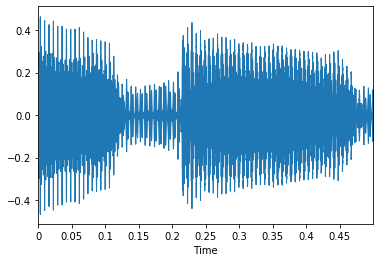

In [29]:
f = 'outer_test_data/AymanSwaied-baa.wav'
x, fs = librosa.load(f)
print_prediction(f)
ds.waveplot(x, sr=fs)
IPython.display.Audio(f)

The predicted class is: Qaf 

Baa 		 :  0.41602259874343872070312500000000
Daal 		 :  0.00127434334717690944671630859375
Jeem 		 :  0.00000030701170317115611396729946
No 		 :  0.00001434607838746160268783569336
Qaf 		 :  0.55077499151229858398437500000000
Taa 		 :  0.03191347420215606689453125000000


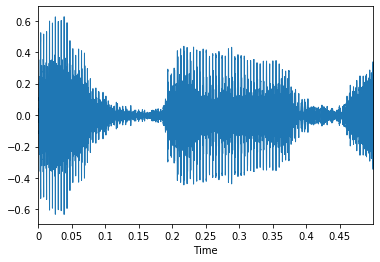

In [30]:
f = 'outer_test_data/AymanSwaied-qaf.wav'
x, fs = librosa.load(f)
print_prediction(f)
ds.waveplot(x, sr=fs)
IPython.display.Audio(f)